# Using MGsearththroughPG.py for Reinitz 2009 Paper

In this notebook, I go over some of my findings from searching through the fully connected ACDC network in essential mode. 

In [1]:
import DSGRN
from DSGRN import *

import sys
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from NFixedPointQuery import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *

Below, I am increasing the cap of the recursion limit. If I do this for this database, I have no issues running the code. Additionally, the code runs quickly (seconds usually). 

In [2]:
import sys 
sys.setrecursionlimit(10**8) 

In [3]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_FullconnE.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_FullconnE")

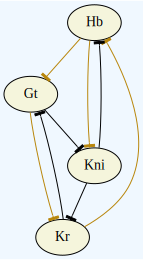

In [4]:
DrawGraph(network)

My initial search was looking for tristability to bistability as described in the Reinitz 2009 paper. The tristability set of fixed points, in order of [Hb, Gt, Kr, Kni], was {2,2,0,0}, {2,0,2,0}, {0,0,2,0} and the bistability was {2,0,0,0}, {2,0,2,0}. Initially, I searched for existence of each of these fixed points sets in the morse graphs. 

In [5]:
b2200 = {"Hb":2, "Gt":2, "Kr":0, "Kni":0}
b2020 = {"Hb":2, "Gt":0, "Kr":2, "Kni":0}
b0020 = {"Hb":0, "Gt":1, "Kr":2, "Kni":1}

b2000 = {"Hb":0, "Gt":1, "Kr":2, "Kni":1}
bb2020 = {"Hb":2, "Gt":0, "Kr":2, "Kni":0}

In [6]:
X1 = NFixedPointQuery(database, b2200,b2020,b0020).matches()
X2 = NstableQuery(database, 4).matches()
X1.difference(X2)

2020-08-07 09:50:45.170516:
MatchQuery({'Hb': 2, 'Gt': 2, 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-07 09:50:45.171276:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 09:50:45.171725:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-07 09:50:45.172992:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-07 09:50:45.173543:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 09:50:45.173968:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.174365:
MatchQuery :: constructed
2020-08-07 09:50:45.174804:
MatchQuery({'Hb': 2, 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 09:50:4

{350, 357, 483, 487, 803, 827}

In [7]:
X1 = NFixedPointQuery(database, b2000,bb2020).matches()
X2 = NstableQuery(database, 3).matches()
X1.difference(X2)

2020-08-07 09:50:45.187487:
MatchQuery({'Hb': 0, 'Gt': 1, 'Kr': 2, 'Kni': 1}, Matches0)
2020-08-07 09:50:45.188188:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 1, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 1%'"]
2020-08-07 09:50:45.188556:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _, _%';
2020-08-07 09:50:45.189444:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _, _%';
2020-08-07 09:50:45.190022:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-07 09:50:45.190572:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 1%';
2020-08-07 09:50:45.191180:
MatchQuery :: constructed
2020-08-07 09:50:45.191905:
MatchQuery({'Hb': 2, 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 09:50:4

{339, 345, 389, 390, 391, 478}

Once I learned that there were morse graphs with the desired properties, I did a search using the `MGsearchthroughPG.py` query. However, I did not find any paths in the parameter graph. I tried many different fixed points sets and the closest one I found with paths in the parameter graph is {2,2,0,0}, {2,0,2,0}, {0,1,2,1} to {0,1,2,1}, {2,0,2,0}. 

In [8]:
D = [[b2200, b2020, b0020], [b2000, bb2020]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-07 09:50:45.203238:
MatchQuery({'Hb': 2, 'Gt': 2, 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-07 09:50:45.203844:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 09:50:45.204207:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-07 09:50:45.205095:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-07 09:50:45.205649:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 09:50:45.206182:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.206702:
MatchQuery :: constructed
2020-08-07 09:50:45.207264:
MatchQuery({'Hb': 2, 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 09:50:4

2020-08-07 09:50:45.259658:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-07 09:50:45.260560:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-07 09:50:45.261293:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-07 09:50:45.261848:
MatchQuery :: create temp table Matches1 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.262386:
MatchQuery :: constructed
2020-08-07 09:50:45.263006:
MatchQuery({'Hb': 0, 'Gt': 1, 'Kr': 2, 'Kni': 1}, Matches2)
2020-08-07 09:50:45.263354:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 1, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 1%'"]
2020-08-07 09:50:45.263699:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotat

In [9]:
M

[[7586, 7635, 7621],
 [17240, 17239, 17225],
 [17240, 17239, 17337],
 [7636, 7635, 7621],
 [7587, 5186, 5172],
 [17191, 17240, 17338],
 [17191, 17240, 17226],
 [5186, 5235, 5221],
 [14790, 17191, 17289],
 [14790, 17191, 17177],
 [14790, 14776],
 [7636, 7622],
 [17191, 17289],
 [5186, 5172],
 [17240, 17338],
 [17239, 17225],
 [14790, 14888],
 [17240, 17226],
 [17190, 17176],
 [7635, 7621],
 [14839, 14937],
 [17190, 17288],
 [7587, 7573],
 [17191, 17177],
 [5235, 5221],
 [7586, 7572],
 [14839, 14825],
 [17239, 17337]]

This next bit is just finding the MG index so we can take a look at the morse graphs. I should turn this into an actual function at some point. 

In [10]:
n = 11
c = database.conn.cursor()
PGlist = M[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',M[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [7636, 7622]
Associated MGI: [(7622, 339), (7636, 487)]


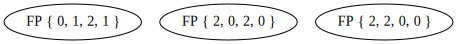

In [11]:
database.DrawMorseGraph(487)

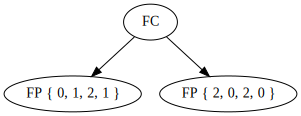

In [12]:
database.DrawMorseGraph(339)

After reading through the Reinitz 2009 paper, I do not think that bistability fixed point {0,1,2,1} is representative of the findings they have. Recall that this fixed point is found to be {2,0,0,0} in the paper. So this next bit is looking for tristability to bistability with some intermediate step that at least has the fixed point {2,0,2,0} since we know that this fixed point remains after the bifurcation at 57% A-P. I found a path that begins with fixed points {2,2,0,0}, {2,0,2,0}, {0,1,2,1}, goes to {2,2,0,0}, {2,0,2,0} and then to {2,1,0,0}, {2,0,2,0}. This can be seen below. 

In [13]:
b2200 = {"Hb":2, "Gt":2, "Kr":0, "Kni":0}
b2020 = {"Hb":2, "Gt":0, "Kr":2, "Kni":0}
b0020 = {"Hb":0, "Gt":1, "Kr":2, "Kni":1}

b2000 = {"Hb":2, "Gt":1, "Kr":0, "Kni":0}
bb2020 = {"Hb":2, "Gt":0, "Kr":2, "Kni":0}

In [14]:
D = [[b2200, b2020, b0020], [b2200, b2020], [b2000, bb2020]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-07 09:50:45.339743:
MatchQuery({'Hb': 2, 'Gt': 2, 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-07 09:50:45.340200:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 09:50:45.340845:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-07 09:50:45.341729:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-07 09:50:45.342134:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 09:50:45.342478:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.342817:
MatchQuery :: constructed
2020-08-07 09:50:45.343184:
MatchQuery({'Hb': 2, 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 09:50:4

2020-08-07 09:50:45.396138:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-07 09:50:45.397174:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-07 09:50:45.397771:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-07 09:50:45.398245:
MatchQuery :: create temp table Matches1 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.398675:
MatchQuery :: constructed
2020-08-07 09:50:45.399304:
MatchQuery({'Hb': 0, 'Gt': 1, 'Kr': 2, 'Kni': 1}, Matches2)
2020-08-07 09:50:45.399644:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 1, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 1%'"]
2020-08-07 09:50:45.399947:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotat

2020-08-07 09:50:45.499136:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-07 09:50:45.499729:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-07 09:50:45.500417:
MatchQuery :: create temp table Matches1 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.500921:
MatchQuery :: constructed


In [15]:
M

[[7587, 2785, 21993, 21979],
 [7586, 2784, 2770],
 [7586, 7635, 2833, 2819],
 [7636, 7635, 2833, 2819],
 [7635, 2833, 2819],
 [7636, 2834, 2820],
 [7587, 2785, 2771],
 [14790, 9988, 9974],
 [17240, 17239, 12437, 12423],
 [17239, 12437, 12423],
 [5186, 384, 370],
 [17240, 12438, 12424],
 [17191, 12389, 12375],
 [5235, 433, 419],
 [17190, 12388, 12374],
 [14839, 10037, 10023]]

In [16]:
n = 5
c = database.conn.cursor()
PGlist = M[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',M[n])
print('Associated MGI', MGindex) #doesn't come back in order

Path: [7636, 2834, 2820]
Associated MGI [(2820, 81), (2834, 18), (7636, 487)]


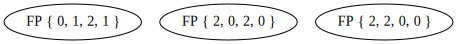

In [17]:
database.DrawMorseGraph(487)

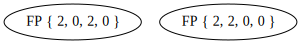

In [18]:
database.DrawMorseGraph(18)

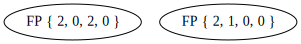

In [19]:
database.DrawMorseGraph(81)

Before I move on to analyzing if these make sense, I do want to point out that the fixed point {2,0,0,0} does not exist in any of the morse graphs. 

In [20]:
b2000 = {"Hb":2, "Gt":0, "Kr":0, "Kni":0}
NFixedPointQuery(database, b2000).matches()

2020-08-07 09:50:45.933778:
MatchQuery({'Hb': 2, 'Gt': 0, 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-07 09:50:45.934370:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 09:50:45.934640:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-07 09:50:45.935606:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-07 09:50:45.936121:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 09:50:45.936466:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 09:50:45.936800:
MatchQuery :: constructed


set()

Overall, I do believe this is the best match so far. For the tristability, we have a morse graph containing fixed points {2,2,0,0}, {2,0,2,0}, {0,1,2,1}. Fixed points {2,2,0,0} and {2,0,2,0} are directly representative of the A1 (Hb, Gt on) and A2 (Hb, Kr on) fixed points from the paper. Although {0,1,2,1} is not exactly A3 (Kr on), after looking at supplemental materials I did find that Kni is slightly elevated so it being at a '1' could still make sense for us. However, Gt being at a '1' here isn't explained by the paper or its supplemental materials. Ending on a morse graph with fixed points {2,1,0,0} and {2,0,2,0} is the best we could hope for since the fixed point {2,0,0,0} (A1, hb on) isn't in any of the morse graphs. However, this is not explained by the paper as far as I am aware of. Additionally, the fixed point {2,2,0,0} in the anterior should transition to {2,1,0,0} before we see an annihilation of {0,1,2,1} but in these paths it is the other way around. I would be interested to see if we get different results in inessential mode. It is important to note that we are not using the full network that was used in the paper.